In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
folder = 'C:/Users/oryan/Documents/mergers-in-cosmos'
student_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/followup-data'
results_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-results'
cosmos_folder = 'E:/cosmos-data'

In [13]:
df = pd.read_csv(f'{data_folder}/cosmos-primary-data.csv', index_col = 0).reset_index().rename(columns = {'index' : 'SourceID'})

In [16]:
df

,SourceID,ID,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLUX_RADIUS,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,5.535906,...,-8.931825e+00,-8.911355e+00,-8.899668e+00,-8.883307e+00,-8.872990e+00,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705532984,857121,150.673667,2.226291,9348.870117,22451.160156,0.000002,0.000004,1.265998e-08,8.876858,...,-1.102382e+01,-1.082684e+01,-1.061214e+01,-1.008995e+01,-9.884142e+00,0.342150,0.435647,0.632192,0.834451,0.937351
2,4000705533312,873195,150.668102,2.242849,9482.499023,22848.505859,0.000007,0.000002,1.829277e-06,5.542504,...,-1.036331e+01,-1.018712e+01,-1.005083e+01,-9.911050e+00,-9.815660e+00,1.108623,1.258513,1.362733,1.408040,1.445569
3,4000705533383,861738,150.645118,2.237538,10033.689453,22720.843750,0.000039,0.000078,1.332813e-05,5.169795,...,-9.574272e+00,-9.548649e+00,-9.503962e+00,-9.439343e+00,-9.384205e+00,0.240042,0.281559,0.330791,0.384371,0.436491
4,4000705539529,1284864,149.686223,2.637412,33027.406250,32317.517578,0.000031,0.000030,1.244353e-06,6.412690,...,-9.669377e+00,-9.614943e+00,-9.570104e+00,-9.533121e+00,-9.476167e+00,0.094187,0.114436,0.140990,0.159430,0.183608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,6000535064806,1041748,150.435644,2.404769,15058.375977,26733.025391,0.000284,0.000249,1.584763e-05,3.683371,...,-8.715841e+00,-8.601144e+00,-8.466426e+00,-8.338096e+00,-8.265055e+00,0.216840,0.269234,0.351659,0.400523,0.462082
3782,6000535121007,997393,149.712229,2.359027,32405.687500,25635.718750,0.000051,0.000031,8.479790e-06,9.109251,...,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20,NaN,NaN,NaN,NaN,NaN
3783,6000535781610,1231637,150.428931,2.588176,15220.276367,31134.923828,0.000496,0.000437,-8.376359e-05,3.791407,...,-9.657442e+00,-9.606500e+00,-9.499937e+00,-9.339849e+00,-9.242270e+00,0.021844,0.021844,0.062948,0.119779,0.160169
3784,6000535864481,1042682,150.505365,2.407106,13386.495117,26789.533203,0.011980,0.011985,-7.998707e-07,4.652697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_red = df[['SourceID', 'ID', 'ez_z_phot', 'lp_zBEST', 'ez_LIR', 'ez_L2800', 'lp_mass_best', 'ez_mass_p025', 'ez_sfr', 'lp_SFR_best']].drop_duplicates('ID', keep='first').dropna(subset=['ez_LIR', 'ez_L2800', 'lp_mass_best', 'ez_mass_p025'])

In [15]:
df_red.head()

,SourceID,ID,ez_z_phot,lp_zBEST,ez_LIR,ez_L2800,lp_mass_best,ez_mass_p025,ez_sfr,lp_SFR_best
0,4000705532455,816891,0.519525,0.5304,1.461746e+10,6.532970e+09,9.28590,9.451602,0.589695,0.8747
1,4000705532984,857121,0.219858,0.2235,3.296368e+10,4.729188e+09,10.49288,10.749892,0.249006,0.7681
2,4000705533312,873195,0.346519,0.3024,3.561132e+10,1.346792e+09,10.18078,10.401312,0.333938,0.1615
3,4000705533383,861738,0.619803,0.6224,5.621026e+09,5.348111e+09,9.36051,9.713334,0.250086,0.7731
4,4000705539529,1284864,0.705821,0.6984,4.125722e+10,1.431745e+10,10.17034,10.445943,0.901761,1.2530


.assign(uv_sfr = concat_df.ez_L2800.apply(lambda x: 3.234e-10 * x))

.assign(ir_sfr = uv_sfr_df.ez_LIR.apply(lambda x: 0.98e-10 * x))

In [6]:
def picking_z(ez_z, lp_z):
    if np.isnan(ez_z):
        if not np.isnan(lp_z):
            return lp_z
        else:
            return np.nan
    
    if np.isnan(lp_z):
        if not np.isnan(ez_z):
            return ez_z
        else:
            return np.nan
    
    if lp_z < ez_z:
        return lp_z
    elif ez_z <= lp_z:
        return ez_z
    else:
        return 'what'

In [7]:
### From paper provided by Brooke: (3.234e-10 * row.ez_L2800) + (0.98e-10 * row.ez_LIR)

In [8]:
df_sfr = (
    df_red
    .assign(log_sfr_tot = df_red.apply(lambda row: np.log10(1.09e-10 * (row.ez_LIR + (3.3 * row.ez_L2800))), axis = 1))
    .assign(redshift = df_red.apply(lambda row: picking_z(row.ez_z_phot, row.lp_zBEST), axis = 1))
)

In [9]:
df_sfr.head()

,SourceID,ID,ez_z_phot,lp_zBEST,ez_LIR,ez_L2800,lp_mass_best,ez_mass_p025,ez_sfr,lp_SFR_best,log_sfr_tot,redshift
0,4000705532455,816891,0.519525,0.5304,1.461746e+10,6.532970e+09,9.28590,9.451602,0.589695,0.8747,0.595850,0.519525
1,4000705532984,857121,0.219858,0.2235,3.296368e+10,4.729188e+09,10.49288,10.749892,0.249006,0.7681,0.723795,0.219858
2,4000705533312,873195,0.346519,0.3024,3.561132e+10,1.346792e+09,10.18078,10.401312,0.333938,0.1615,0.640091,0.302400
3,4000705533383,861738,0.619803,0.6224,5.621026e+09,5.348111e+09,9.36051,9.713334,0.250086,0.7731,0.404219,0.619803
4,4000705539529,1284864,0.705821,0.6984,4.125722e+10,1.431745e+10,10.17034,10.445943,0.901761,1.2530,0.984393,0.698400


In [10]:
df_sfr_red = df_sfr.query('redshift < 1.5')

In [11]:
df_sfr_red

,SourceID,ID,ez_z_phot,lp_zBEST,ez_LIR,ez_L2800,lp_mass_best,ez_mass_p025,ez_sfr,lp_SFR_best,log_sfr_tot,redshift
0,4000705532455,816891,0.519525,0.5304,1.461746e+10,6.532970e+09,9.28590,9.451602,0.589695,0.8747,0.595850,0.519525
1,4000705532984,857121,0.219858,0.2235,3.296368e+10,4.729188e+09,10.49288,10.749892,0.249006,0.7681,0.723795,0.219858
2,4000705533312,873195,0.346519,0.3024,3.561132e+10,1.346792e+09,10.18078,10.401312,0.333938,0.1615,0.640091,0.302400
3,4000705533383,861738,0.619803,0.6224,5.621026e+09,5.348111e+09,9.36051,9.713334,0.250086,0.7731,0.404219,0.619803
4,4000705539529,1284864,0.705821,0.6984,4.125722e+10,1.431745e+10,10.17034,10.445943,0.901761,1.2530,0.984393,0.698400
...,...,...,...,...,...,...,...,...,...,...,...,...
3777,6000533039474,574000,0.646439,NaN,5.640924e+10,1.483718e+10,9.81366,10.073006,0.945566,1.3100,1.060151,0.646439
3779,6000534269373,1193387,0.883769,NaN,4.153598e+10,1.530880e+10,9.92413,9.935246,0.906156,1.2340,1.001474,0.883769
3781,6000535064806,1041748,1.091646,NaN,2.728344e+10,7.563722e+09,9.08741,8.988864,0.647998,0.9532,0.755461,1.091646
3783,6000535781610,1231637,0.538722,0.4988,4.591316e+08,4.108110e+08,8.52516,8.611601,-0.800885,-0.6095,-0.703743,0.498800


<AxesSubplot:xlabel='Log(Best Mass)', ylabel='Log(Total SFR)'>

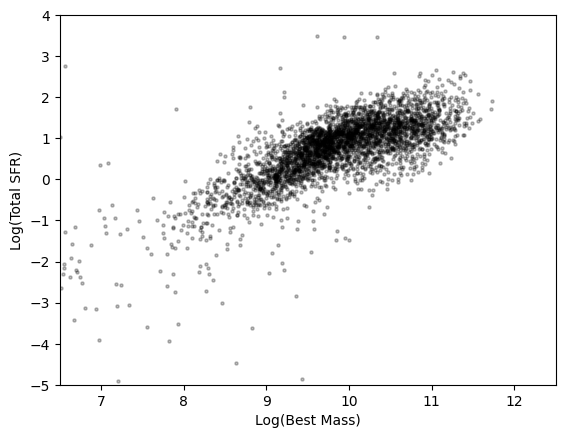

In [13]:
df_sfr_red.plot.scatter(
    x = 'lp_mass_best',
    y = 'log_sfr_tot',
    s = 5,
    color = 'black',
    alpha = 0.25,
    xlabel = 'Log(Best Mass)',
    ylabel = 'Log(Total SFR)',
    xlim = [6.5, 12.5],
    ylim = [-5, 4]
)

In [114]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, colour):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, s = 0.5, color=colour, alpha = 0.25)
    sns.kdeplot(x=x,y=y, ax=ax, thresh = 0.065, levels = 8)
    ax.set_xlim([6.5,12.5])
    ax.set_ylim([-5, 4])

    # now determine nice limits by hand:
    binwidth = 0.15
    xymax = max(12.5, 3.5)
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, histtype = 'step', color = colour)
    ax_histy.hist(y, bins=bins, orientation='horizontal', histtype='step', color=colour)

### Using EAZY Measurements

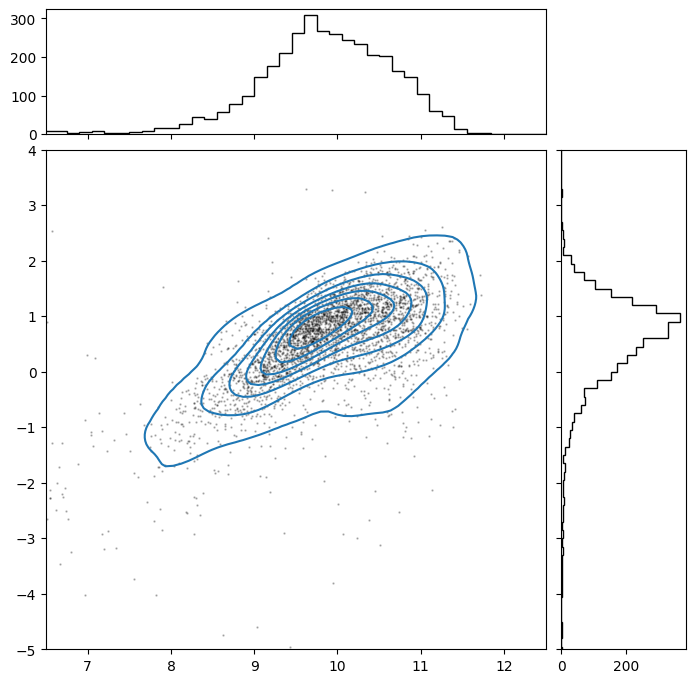

In [115]:
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
ax_histy = fig.add_subplot(gs[1,1],sharey=ax)

# colours = ['black','blue','red','orange']

scatter_hist(np.array(list(df_sfr_red.lp_mass_best)), np.array(list(df_sfr_red.ez_sfr)), ax, ax_histx, ax_histy, 'black')

### Using La Phare Estimation

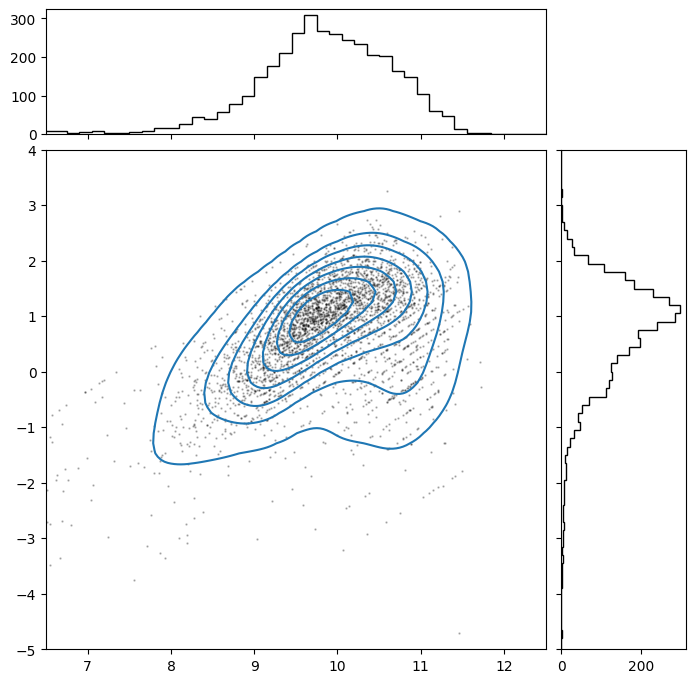

In [116]:
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
ax_histy = fig.add_subplot(gs[1,1],sharey=ax)

# colours = ['black','blue','red','orange']

scatter_hist(np.array(list(df_sfr_red.lp_mass_best)), np.array(list(df_sfr_red.lp_SFR_best)), ax, ax_histx, ax_histy, 'black')

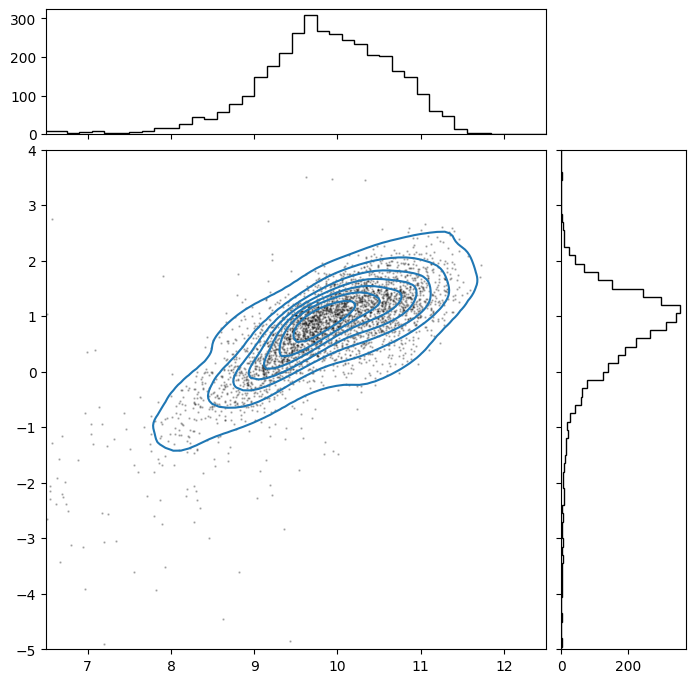

In [117]:
fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
ax_histy = fig.add_subplot(gs[1,1],sharey=ax)

# colours = ['black','blue','red','orange']

scatter_hist(np.array(list(df_sfr_red.lp_mass_best)), np.array(list(df_sfr_red.log_sfr_tot)), ax, ax_histx, ax_histy, 'black')

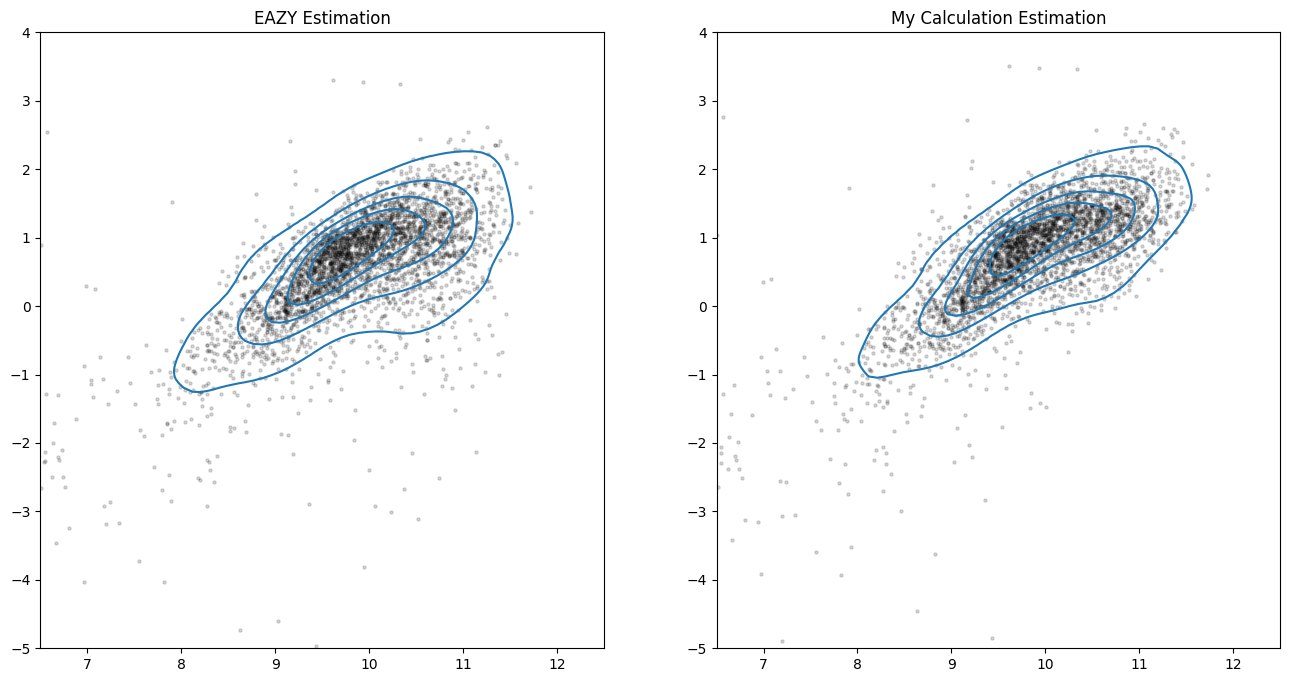

In [118]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
ax[0].scatter(np.array(list(df_sfr_red.lp_mass_best)), np.array(list(df_sfr_red.ez_sfr)), color = 'black', s = 5, alpha = 0.15)
sns.kdeplot(x=np.array(list(df_sfr_red.lp_mass_best)),y=np.array(list(df_sfr_red.ez_sfr)), ax=ax[0], thresh = 0.1, levels = 6)
ax[0].set_title('EAZY Estimation')
ax[0].set_xlim([6.5,12.5])
ax[0].set_ylim([-5,4])

ax[1].scatter(np.array(list(df_sfr_red.lp_mass_best)), np.array(list(df_sfr_red.log_sfr_tot)), color = 'black', s = 5, alpha = 0.15)
sns.kdeplot(x=np.array(list(df_sfr_red.lp_mass_best)),y=np.array(list(df_sfr_red.log_sfr_tot)), ax=ax[1], thresh = 0.1, levels = 6)
ax[1].set_xlim([6.5,12.5])
ax[1].set_ylim([-5,4])
ax[1].set_title('My Calculation Estimation')
plt.show()

### Getting Stages

In [119]:
cat_df = pd.read_csv(f'{data_folder}/source-stage.csv', index_col = 0)

In [120]:
cat_df.head()

,SourceID,category
col1,,
22,4000705532984,stage1
23,4000705533312,stage3
24,4000705533383,stage1
25,4000705539435,stage4
26,4000705539529,stage1


In [121]:
df_sfr_red

,SourceID,ID,ez_z_phot,lp_zBEST,ez_LIR,ez_L2800,lp_mass_best,ez_mass_p025,ez_sfr,lp_SFR_best,log_sfr_tot,redshift
0,4000705532455,816891,0.519525,0.5304,1.461746e+10,6.532970e+09,9.28590,9.451602,0.589695,0.8747,0.595850,0.519525
1,4000705532984,857121,0.219858,0.2235,3.296368e+10,4.729188e+09,10.49288,10.749892,0.249006,0.7681,0.723795,0.219858
2,4000705533312,873195,0.346519,0.3024,3.561132e+10,1.346792e+09,10.18078,10.401312,0.333938,0.1615,0.640091,0.302400
3,4000705533383,861738,0.619803,0.6224,5.621026e+09,5.348111e+09,9.36051,9.713334,0.250086,0.7731,0.404219,0.619803
4,4000705539529,1284864,0.705821,0.6984,4.125722e+10,1.431745e+10,10.17034,10.445943,0.901761,1.2530,0.984393,0.698400
...,...,...,...,...,...,...,...,...,...,...,...,...
3777,6000533039474,574000,0.646439,NaN,5.640924e+10,1.483718e+10,9.81366,10.073006,0.945566,1.3100,1.060151,0.646439
3779,6000534269373,1193387,0.883769,NaN,4.153598e+10,1.530880e+10,9.92413,9.935246,0.906156,1.2340,1.001474,0.883769
3781,6000535064806,1041748,1.091646,NaN,2.728344e+10,7.563722e+09,9.08741,8.988864,0.647998,0.9532,0.755461,1.091646
3783,6000535781610,1231637,0.538722,0.4988,4.591316e+08,4.108110e+08,8.52516,8.611601,-0.800885,-0.6095,-0.703743,0.498800


In [122]:
df_category = df_sfr_red.merge(cat_df, on = 'SourceID', how = 'left').dropna(subset=['category'])

In [123]:
def create_plot(df, ax, stage, control):
    
#     ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
#     ax_histy = fig.add_subplot(gs[1,1],sharey=ax)
    
#     scatter_hist(np.array(list(df.mass_best_1)), np.array(list(df.sfr_best_1)), ax, ax_histx, ax_histy, 'black')
    
    df.plot.scatter(
        x = 'lp_mass_best',
        y = 'log_sfr_tot',
        ax = ax,
        xlim = [5.5,12.5],
        ylim = [-6,3.0],
        xlabel = '',
        ylabel = '',
        title = f'{control} {stage}',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

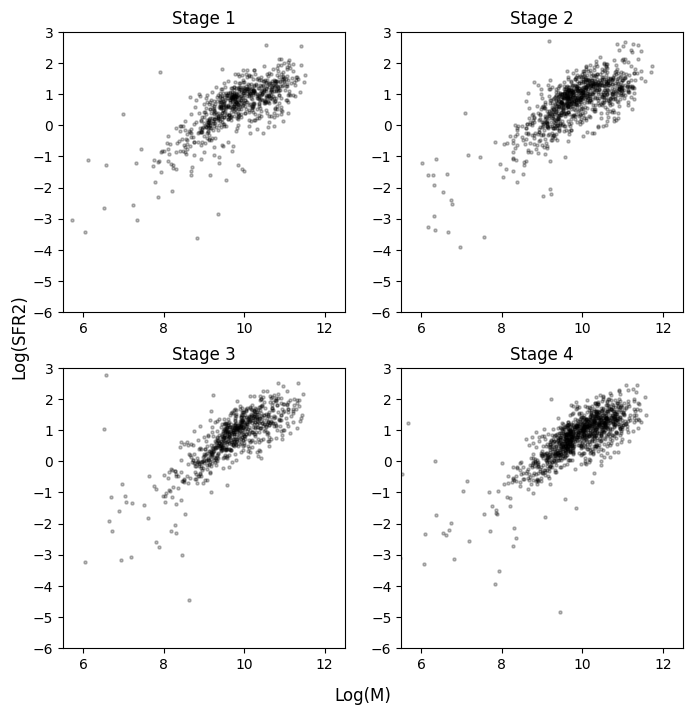

In [124]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_category.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

In [125]:
def create_plot_ez(df, ax, stage, control):
    
#     ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
#     ax_histy = fig.add_subplot(gs[1,1],sharey=ax)
    
#     scatter_hist(np.array(list(df.mass_best_1)), np.array(list(df.sfr_best_1)), ax, ax_histx, ax_histy, 'black')
    
    df.plot.scatter(
        x = 'lp_mass_best',
        y = 'ez_sfr',
        ax = ax,
        xlim = [5.5,12.5],
        ylim = [-6,3.0],
        xlabel = '',
        ylabel = '',
        title = f'{control} {stage}',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

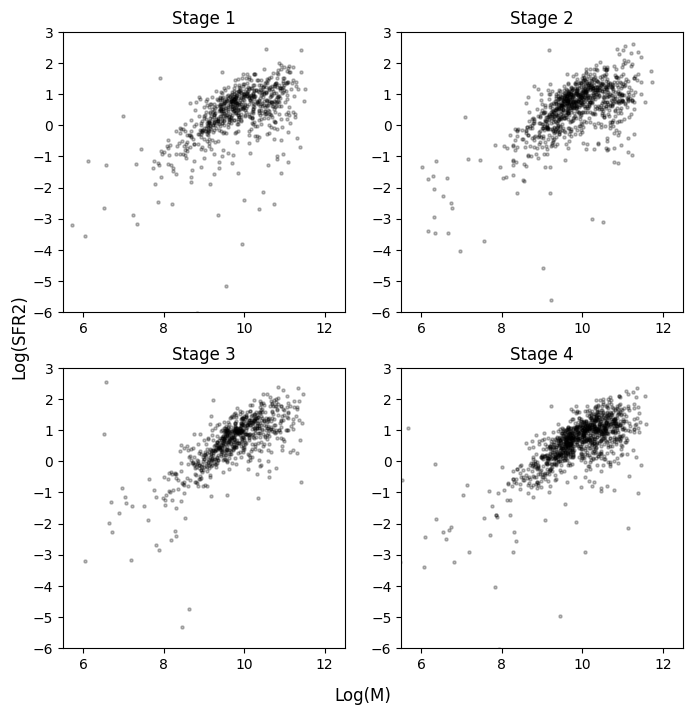

In [127]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_ez(df_category.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

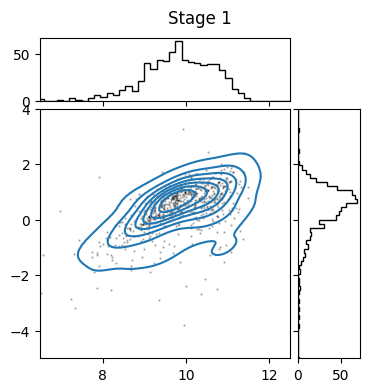

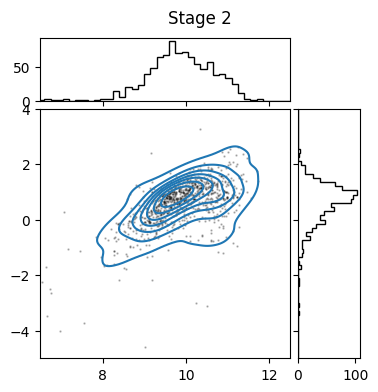

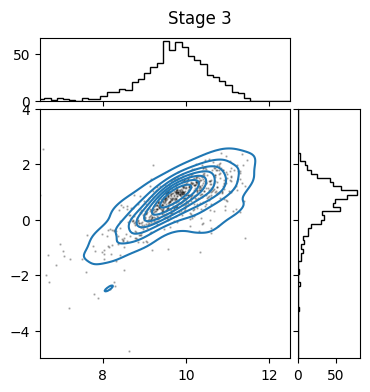

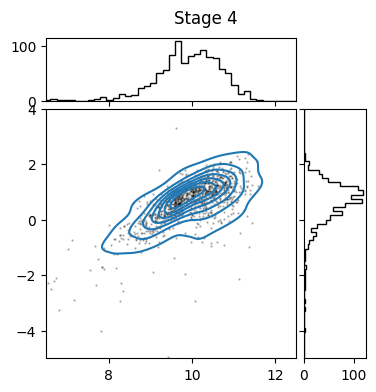

In [130]:
# colours = ['black','blue','red','orange']

for i in range(0,4):
    
    fig = plt.figure(figsize = (4,4))
    gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1,0])
    ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
    ax_histy = fig.add_subplot(gs[1,1],sharey=ax)
    
    df_stage = df_category.query(f'category == "stage{i+1}"')

    scatter_hist(np.array(list(df_stage.lp_mass_best)), np.array(list(df_stage.ez_sfr)), ax, ax_histx, ax_histy, 'black')
    
    fig.text(0.5, 0.95, f'Stage {i + 1}', ha='center', va='center', fontsize = 12)
    
    # plt.savefig(f'{results_folder}/stage{i+1}.jpeg', bbox_inches = 'tight', dpi = 100)
    
    plt.show()

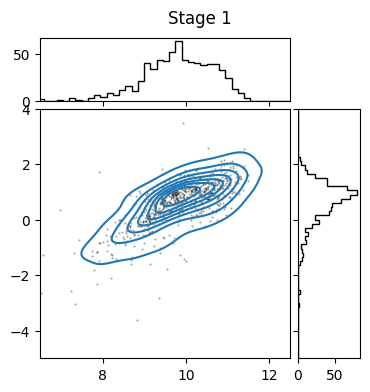

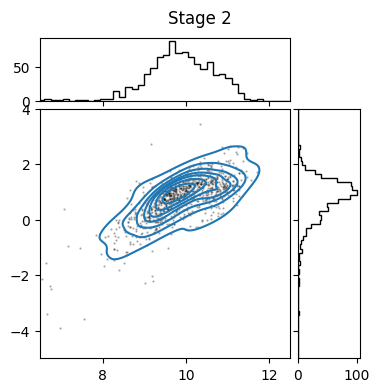

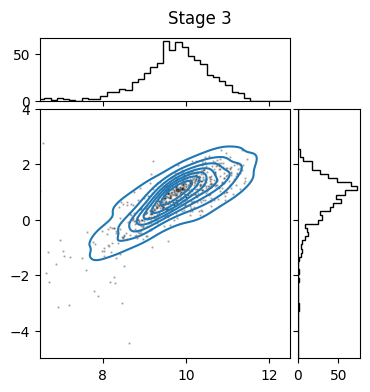

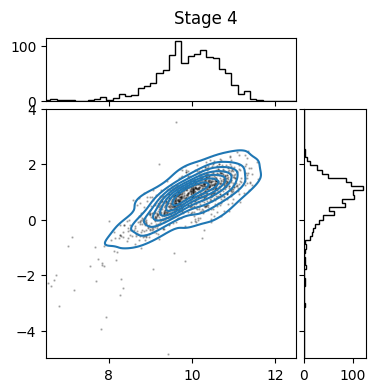

In [129]:
# colours = ['black','blue','red','orange']

for i in range(0,4):
    
    fig = plt.figure(figsize = (4,4))
    gs = fig.add_gridspec(2,2, width_ratios = (4,1), height_ratios = (1,4), left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1,0])
    ax_histx = fig.add_subplot(gs[0,0],sharex=ax)
    ax_histy = fig.add_subplot(gs[1,1],sharey=ax)
    
    df_stage = df_category.query(f'category == "stage{i+1}"')

    scatter_hist(np.array(list(df_stage.lp_mass_best)), np.array(list(df_stage.log_sfr_tot)), ax, ax_histx, ax_histy, 'black')
    
    fig.text(0.5, 0.95, f'Stage {i + 1}', ha='center', va='center', fontsize = 12)
    
    # plt.savefig(f'{results_folder}/stage{i+1}.jpeg', bbox_inches = 'tight', dpi = 100)
    
    plt.show()